In [6]:
from matplotlib import pyplot as plt
import numpy as np

In [7]:
from utils import load_ecg
from data_processing import normalize
from heartpy import remove_baseline_wander, enhance_ecg_peaks

/tmp/ipykernel_22571/894343477.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


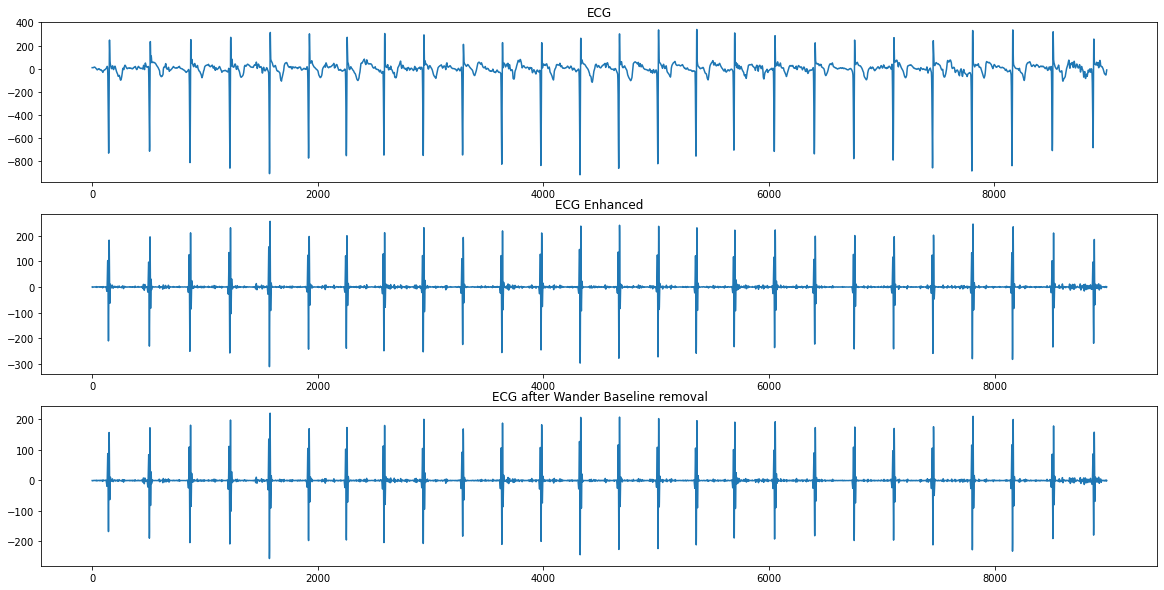

In [58]:
ecg_signal = load_ecg("train_ecg_00001.mat")

# normalize data
normalized_ecg = ecg_signal

# enhanced QRS complex

enhanced_signal = enhance_ecg_peaks(hrdata=ecg_signal, sample_rate=300)

# remove noise
ohne_noise_ecg = remove_baseline_wander(enhanced_signal, sample_rate=300, cutoff=0.05)

fig, axs = plt.subplots(3, figsize=(20,10))
axs[0].plot(ecg_signal)
axs[0].set_title("ECG")
axs[1].plot(enhanced_signal)
axs[1].set_title("ECG Enhanced")
axs[2].plot(ohne_noise_ecg)
axs[2].set_title("ECG after Wander Baseline removal")

fig.show()

In [24]:
signal.shape

(9000,)

In [39]:
SAMPLE_RATE=300
N = signal.shape[0]

signal = 

In [40]:
signal

0        389
1        459
2        523
3        583
4        607
        ... 
17995     22
17996     19
17997     17
17998     14
17999     10
Length: 18000, dtype: int16

/tmp/ipykernel_22571/1310155834.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


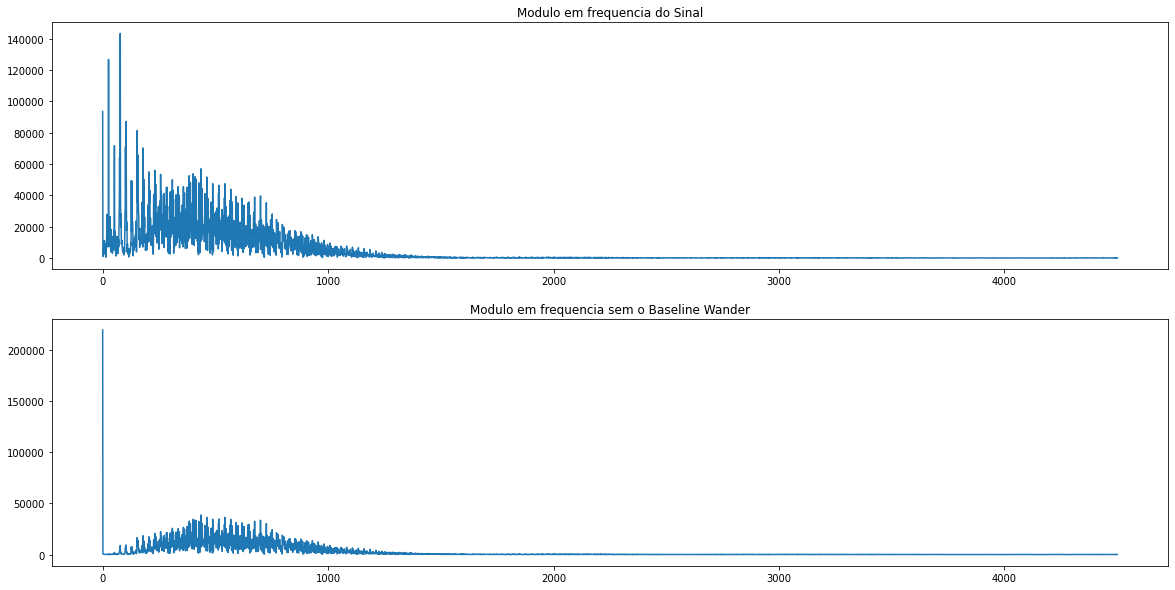

In [57]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
signal = load_ecg("train_ecg_00001.mat")
ohne_noise_ecg = remove_baseline_wander(signal, sample_rate=300, cutoff=0.05)

# xf = rfftfreq(N, 1 / SAMPLE_RATE)
fig, axs = plt.subplots(2, figsize=(20,10))
axs[0].plot(np.abs(rfft(signal)))
axs[0].set_title("Modulo em frequencia do Sinal")
axs[1].plot(np.abs(rfft(ohne_noise_ecg)))
axs[1].set_title("Modulo em frequencia sem o Baseline Wander")
fig.show()

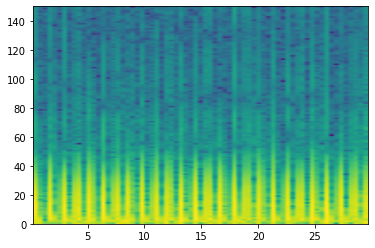

In [26]:
# N
signal = load_ecg("train_ecg_00001.mat")
plt.specgram(signal, Fs=SAMPLE_RATE);

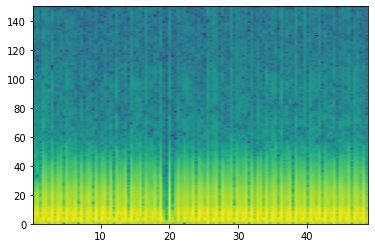

In [13]:
# O
plt.specgram(load_ecg("train_ecg_00003.mat"), Fs=300);

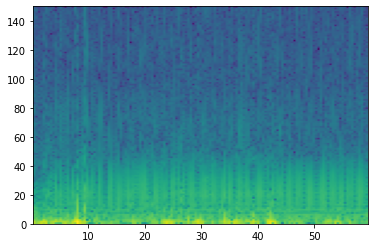

In [15]:
# ~ Ruido
plt.specgram(load_ecg("train_ecg_00011.mat"), Fs=300);

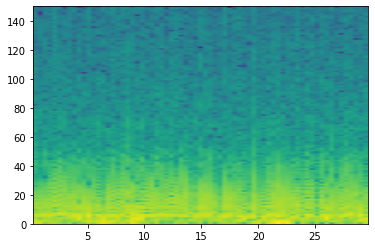

In [17]:
# A
plt.specgram(load_ecg("train_ecg_00016.mat"), Fs=300);

## RR  Peaks with BioSPY

In [60]:
import biosppy
import pyhrv.tools as tools

# Load sample ECG signal & extract R-peaks using BioSppy
signal = load_ecg("train_ecg_00001.mat")
signal, rpeaks = biosppy.signals.ecg.ecg(signal, show=False)[1:3]

# Compute NNI
nni = tools.nn_intervals(rpeaks)

# Filter ECG Signal

In [1]:
from utils import load_ecg
from data_processing import normalize
from heartpy.filtering import filter_signal

In [2]:
def analyse_filtered(signal, signal_filtered):
    fig, axs = plt.subplots(2, figsize=(20,10))
    axs[0].plot(signal)
    axs[0].set_title("Sinal sem Filtro")
    axs[1].plot(signal_filtered)
    axs[1].set_title("Sinal Filtrado")
    fig.show()

In [16]:
ecg_signal = normalize(load_ecg("train_ecg_00001.mat"))

In [17]:
from filtering import remove_noise, remove_baseline_wander
sig = remove_noise(ecg_signal)
filtered_signal = remove_baseline_wander(sig, sample_rate=300, cutoff=0.05)
 

/tmp/ipykernel_20861/798309201.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


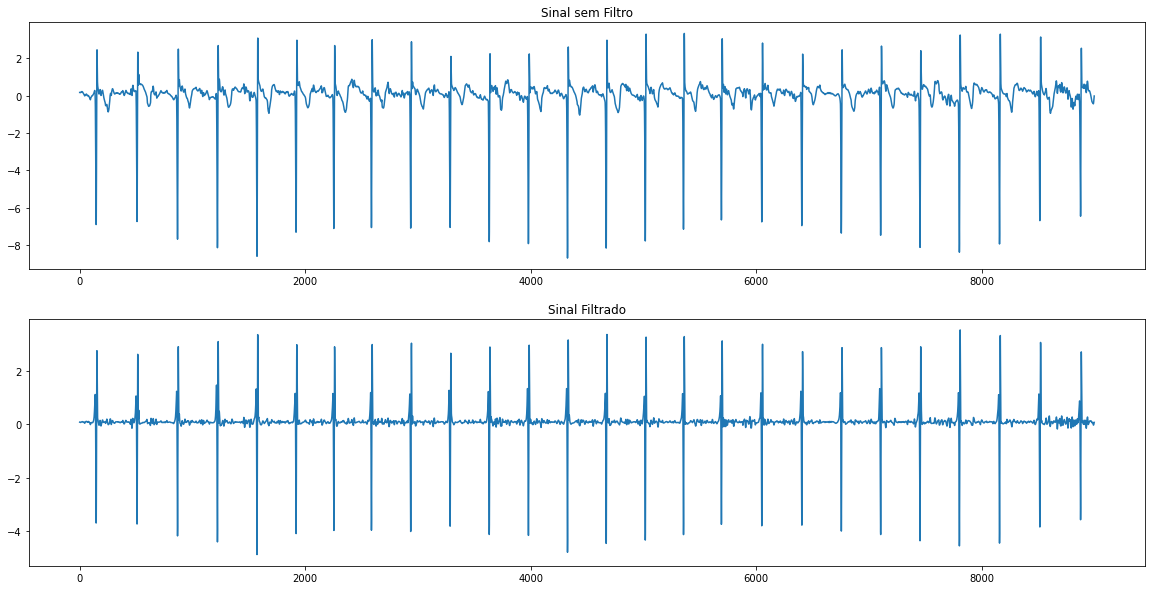

In [18]:
analyse_filtered(ecg_signal, filtered_signal)